In [1]:
import os
import math
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [57]:
# input_csv_file
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [58]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'

In [59]:
ind = pd.read_csv(scaled_kolkata_backup_csv_path)

In [60]:
ind.head(5).T

,0,1,2,3,4
Country,0,0,0,0,0
Song Name,Amar Bhindeshi Tara - Chondrobindu (Lyrics).wav,Amar Priya Cafe by Moheener Ghoraguli.wav,Ami ek garib premik neela আমি এক গরীব প্রেমিক ...,Amra Bhison EkaCactus আমরা ভীষণ একা ক্যাকটাস L...,Aro Ekber Fossils Audio Song Rupam Islam.wav
Popularity,0.795455,0.545455,0.386364,0.0,1.0
Time Signature,0.5,0.5,0.5,0.5,0.5
Duration MS,0.238648,0.426879,0.181109,0.253378,0.537412
Tempo,0.37733,0.125274,0.425528,0.819996,0.518962
Valence,0.352391,0.389775,0.585487,0.424959,0.1116
Liveness,0.114391,0.057918,0.141665,0.20584,0.019734
Instrumentalness,0.0,0.0,0.000333,0.0,0.032134
Acousticness,0.885777,0.674826,1.0,0.347594,0.075312


In [61]:
ind.describe([.1,.25,.5,.75,.9,.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Popularity,73.0,0.457347,0.253673,0.0,0.136364,0.250000,0.454545,0.636364,0.750000,1.000000,1.0
Time Signature,73.0,0.458904,0.181686,0.0,0.100000,0.500000,0.500000,0.500000,0.500000,1.000000,1.0
Duration MS,73.0,0.353087,0.182809,0.0,0.140366,0.217312,0.342591,0.439496,0.602038,0.870154,1.0
Tempo,73.0,0.399391,0.235470,0.0,0.108323,0.175901,0.456334,0.532094,0.662837,0.975219,1.0
Valence,73.0,0.430870,0.243835,0.0,0.124574,0.254535,0.393073,0.592084,0.780319,0.997625,1.0
Liveness,73.0,0.227679,0.194579,0.0,0.046880,0.103963,0.148083,0.305310,0.484037,0.797850,1.0
Instrumentalness,73.0,0.057585,0.170587,0.0,0.000000,0.000000,0.000598,0.021280,0.149268,0.903415,1.0
Acousticness,73.0,0.369022,0.337811,0.0,0.007200,0.040942,0.285852,0.674826,0.884543,0.968882,1.0
Speechiness,73.0,0.131795,0.157088,0.0,0.015834,0.045350,0.081476,0.162952,0.269485,0.712221,1.0


<AxesSubplot: title={'center': 'Ind Songs : Top vs Bottom'}>

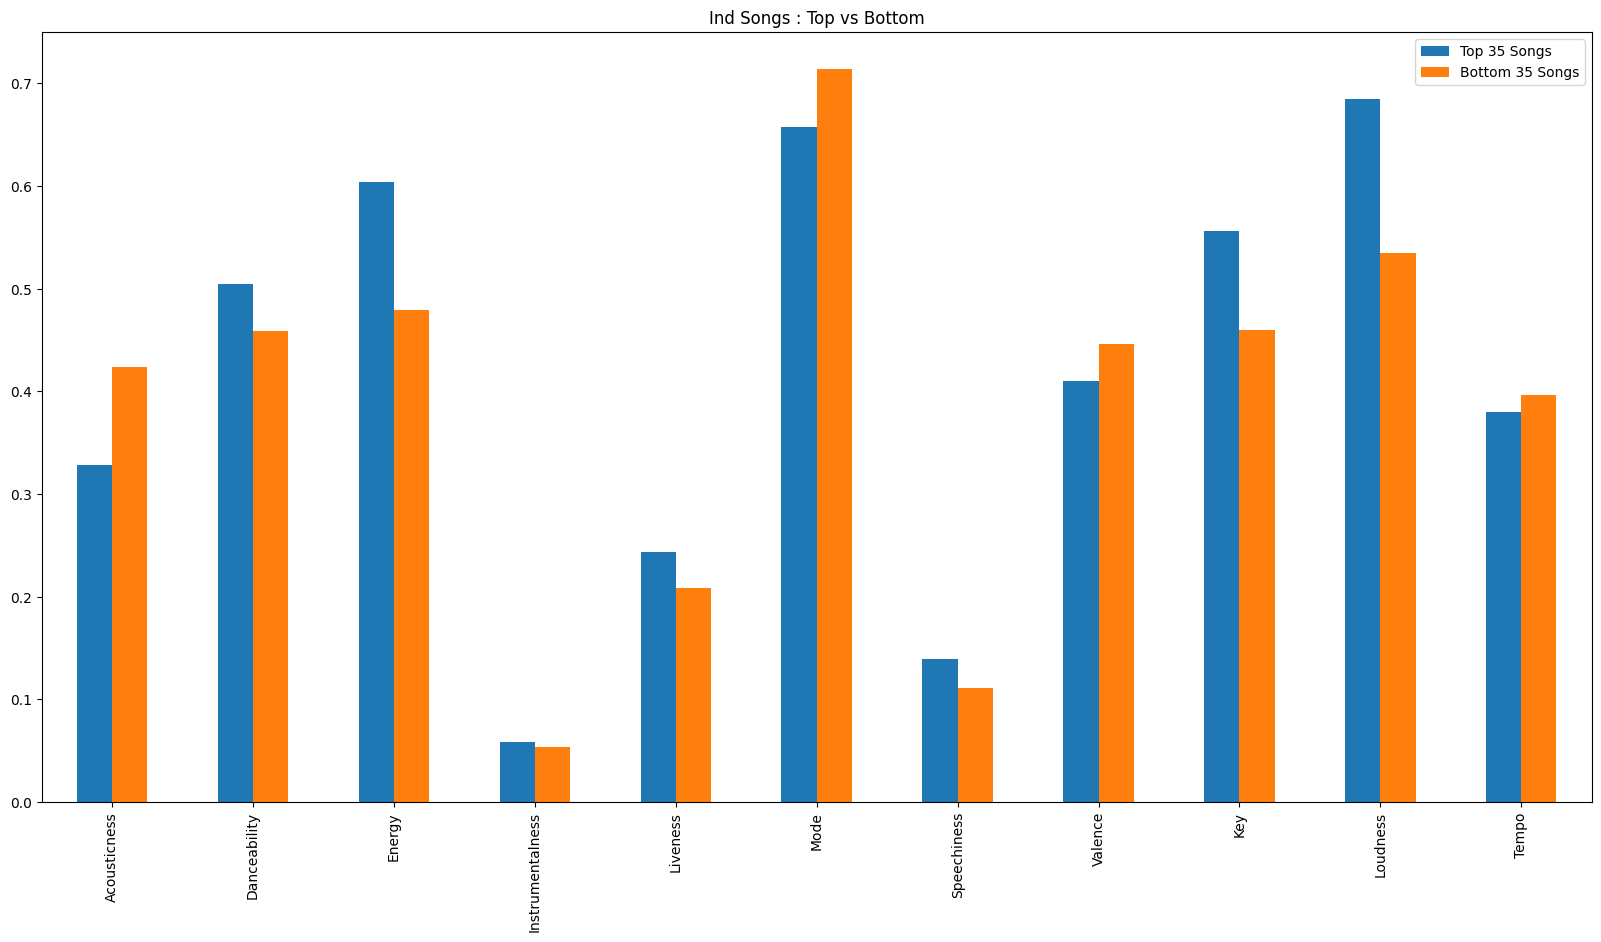

In [62]:
# Top 20
check = ind.sort_values(by = 'Popularity',ascending=False).head(35)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Top 35 Songs'])

# Mid 20
# check = audiodf[audiodf['Popularity'].between(audiodf['Popularity'].quantile(0.45),audiodf['Popularity'].quantile(0.55))]
# check = check[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence']].head(20)
# check = check.T
# mid_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Mid 20 Songs'])

# Bottom 20
check = ind.sort_values(by = 'Popularity',ascending=False).tail(35)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom_20 = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Bottom 35 Songs'])

# top_bottom = pd.concat([top_20,mid_20, bottom_20], axis = 1)
top_bottom = pd.concat([top_20, bottom_20], axis = 1)

top_bottom.plot(title = 'Ind Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: >

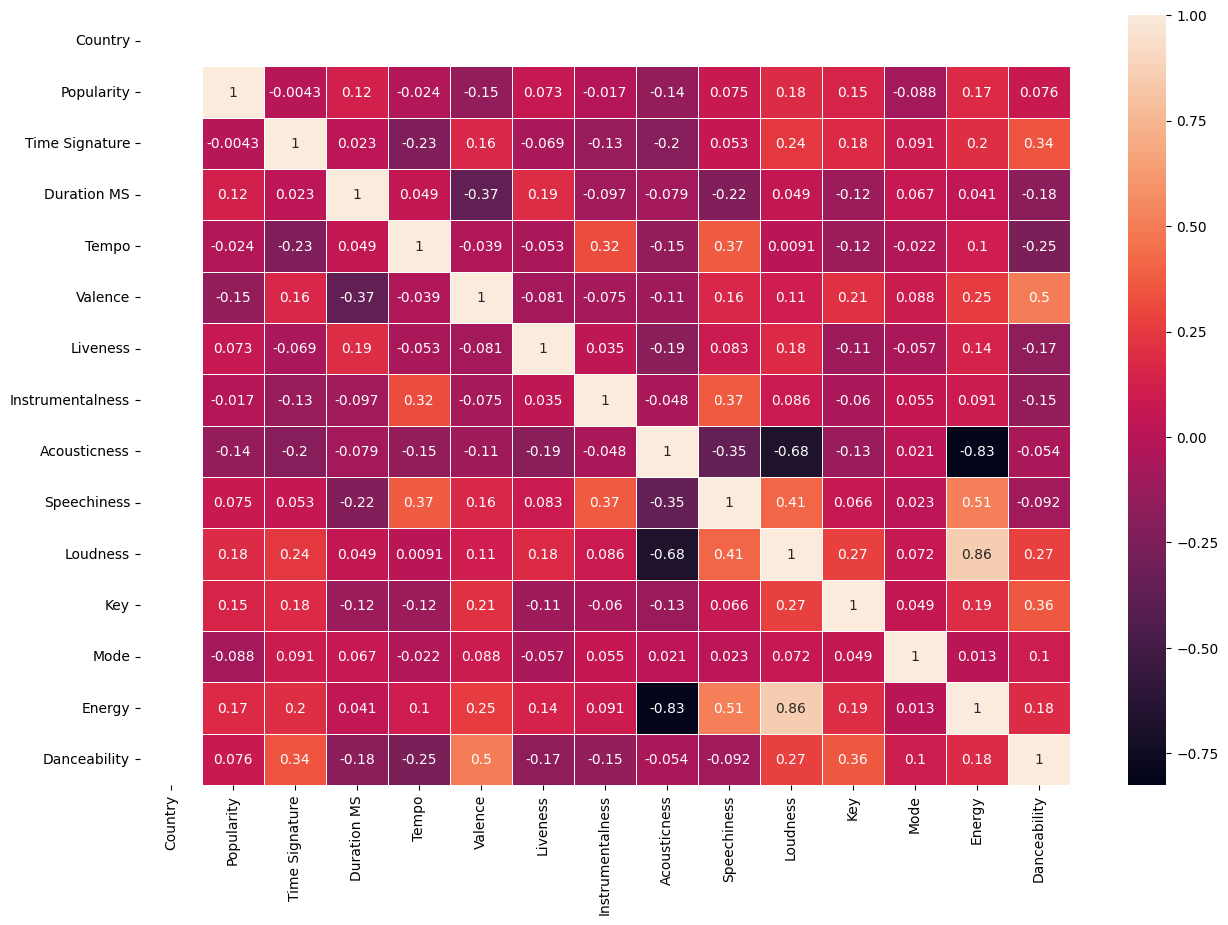

In [63]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(ind.corr(), annot=True,linewidths=.5, ax=ax)